In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

In [4]:
labels = pd.read_csv('../../csv/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [5]:
values = pd.read_csv('../../csv/train_values.csv')
values.loc[values["geo_level_2_id"] == 1]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
3581,402891,8,1,1619,1,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4373,575655,8,1,2487,3,10,5,7,t,r,...,0,0,0,0,0,0,0,0,0,0
4913,723221,8,1,7994,3,10,7,7,t,r,...,0,0,0,0,0,0,0,0,0,0
4955,160030,8,1,7994,3,35,5,7,t,r,...,0,0,0,0,0,0,0,0,0,0
5117,935321,8,1,7994,3,10,5,7,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253679,92319,8,1,7994,2,10,3,5,t,r,...,0,0,0,0,0,0,0,0,0,0
256607,1007386,8,1,11655,2,60,6,6,n,r,...,0,0,0,0,0,0,0,0,0,0
258220,487596,8,1,1619,2,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
260084,419559,8,1,1619,2,5,10,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
values.isnull().values.any()

False

In [7]:
labels.isnull().values.any()

False

In [8]:
values.dtypes 

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [9]:
values["building_id"].count() == values["building_id"].drop_duplicates().count()

True

In [10]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [11]:
to_be_categorized = ["land_surface_condition", "foundation_type", "roof_type",\
                     "position", "ground_floor_type", "other_floor_type",\
                     "plan_configuration", "legal_ownership_status"]
for row in to_be_categorized:
    values[row] = values[row].astype("category")
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [12]:
datatypes = dict(values.dtypes)
for row in values.columns:
    if datatypes[row] != "int64" and datatypes[row] != "int32" and \
       datatypes[row] != "int16" and datatypes[row] != "int8":
        continue
    if values[row].nlargest(1).item() > 32767 and values[row].nlargest(1).item() < 2**31:
        values[row] = values[row].astype(np.int32)
    elif values[row].nlargest(1).item() > 127:
        values[row] = values[row].astype(np.int16)
    else:
        values[row] = values[row].astype(np.int8)
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int32   
 1   geo_level_1_id                          260601 non-null  int8    
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int8    
 7   height_percentage                       260601 non-null  int8    
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [13]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [14]:
labels["building_id"] = labels["building_id"].astype(np.int32)
labels["damage_grade"] = labels["damage_grade"].astype(np.int8)
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int32
 1   damage_grade  260601 non-null  int8 
dtypes: int32(1), int8(1)
memory usage: 1.2 MB


# Nuevo Modelo

In [15]:
important_values = values\
                .merge(labels, on="building_id")
important_values.drop(columns=["building_id"], inplace = True)
important_values["geo_level_1_id"] = important_values["geo_level_1_id"].astype("category")
important_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,2
260597,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
260598,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,3
260599,26,39,1851,2,10,14,6,t,r,x,...,0,0,0,0,0,0,0,0,0,2


In [16]:
important_values.shape

(260601, 39)

In [17]:

X_train, X_test, y_train, y_test = train_test_split(important_values.drop(columns = 'damage_grade'),
                                                    important_values['damage_grade'], test_size = 0.2, random_state = 123)

In [18]:
#OneHotEncoding
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = ["geo_level_1_id", "land_surface_condition", "foundation_type", "roof_type",\
                     "position", "ground_floor_type", "other_floor_type",\
                     "plan_configuration", "legal_ownership_status"]
for feature in features_to_encode:
    X_train = encode_and_bind(X_train, feature)
    X_test = encode_and_bind(X_test, feature)

In [19]:
X_train

,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
103291,1274,4190,2,25,8,5,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
233923,1207,12014,1,10,9,3,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
166653,944,8232,3,40,7,6,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
150634,488,12448,2,0,7,5,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
82720,302,5339,1,10,5,3,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,217,10644,1,25,4,6,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
17730,600,4813,2,20,13,8,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
28030,463,4692,2,10,9,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
15725,600,157,2,50,5,8,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
# # Busco los mejores tres parametros indicados abajo.
# max_features = [35, 40, 45]
# min_samples_split = [10, 15, 20]
# min_impurity_decrease = [0.0, 0.01, 0.025, 0.05, 0.1]

# hyperF = {'min_impurity_decrease': min_impurity_decrease,
#           'max_features': max_features,  
#           'min_samples_split': min_samples_split}

# gridF = GridSearchCV(estimator = RandomForestClassifier(random_state = 123,
#                                                         n_estimators = 150,
#                                                         max_depth = None,
#                                                         min_samples_leaf = 1,
#                                                         criterion = "gini"),
#                      scoring = 'f1_micro',
#                      param_grid = hyperF,
#                      cv = 3,
#                      verbose = 1, 
#                      n_jobs = -1)

# bestF = gridF.fit(X_train, y_train)

In [21]:
# res = pd.DataFrame(bestF.cv_results_)
# res

In [22]:
# Utilizo los mejores parametros segun el GridSearch
rf_model = RandomForestClassifier(n_estimators = 150,
                                  max_depth = None,
                                  max_features = 45,
                                  min_samples_split = 15,
                                  min_samples_leaf = 1,
                                  criterion = "gini",
                                  verbose=True)
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.6min finished


RandomForestClassifier(max_features=45, min_samples_split=15, n_estimators=150,
                       verbose=True)

In [23]:
rf_model.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    9.1s finished


0.8667929777436685

In [24]:
# Calculo el F1 score para mi training set.
y_preds = rf_model.predict(X_test)
f1_score(y_test, y_preds, average='micro')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.4s finished


0.7392221945089311

In [25]:
rf_model.feature_importances_

array([1.34461106e-01, 1.25140996e-01, 1.47998298e-02, 7.16766053e-02,
       7.10077792e-02, 4.25853616e-02, 5.57350204e-03, 1.83885178e-02,
       5.57076662e-03, 2.67427836e-03, 5.40818460e-03, 7.03365268e-03,
       1.19006554e-02, 5.64764148e-03, 3.55880160e-03, 1.33493019e-03,
       3.47199338e-03, 1.93533068e-02, 7.04133512e-03, 5.08996512e-03,
       3.05408606e-03, 1.06371510e-03, 2.15675003e-04, 8.15753600e-05,
       3.85230735e-04, 5.09520338e-05, 1.85793633e-05, 2.19798535e-05,
       1.25967509e-03, 1.07656196e-03, 1.06597518e-03, 7.20527955e-04,
       3.82799735e-03, 2.64106365e-03, 9.83293163e-04, 5.45904611e-03,
       7.23464264e-03, 2.01296074e-02, 1.58518714e-03, 1.05145556e-02,
       5.38232312e-03, 1.10542391e-03, 3.83700108e-03, 8.50218704e-04,
       7.78304944e-04, 1.28451901e-03, 1.01725742e-01, 1.36740816e-02,
       4.41394832e-04, 2.81060103e-03, 2.21358286e-02, 1.52458617e-03,
       6.03983237e-04, 7.81277809e-04, 1.20789908e-03, 1.61946577e-02,
      

In [28]:
test_values = pd.read_csv('../../csv/test_values.csv', index_col = "building_id")
test_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
99355,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
890251,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
745817,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
421793,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,4,605,3623,3,70,20,6,t,r,q,...,1,0,0,0,0,0,0,0,0,0
663567,10,1407,11907,3,25,6,7,n,r,n,...,0,0,0,0,0,0,0,0,0,0
1049160,22,1136,7712,1,50,3,3,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test_values_subset = test_values
test_values_subset["geo_level_1_id"] = test_values_subset["geo_level_1_id"].astype("category")
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
99355,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
890251,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
745817,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
421793,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,4,605,3623,3,70,20,6,t,r,q,...,1,0,0,0,0,0,0,0,0,0
663567,10,1407,11907,3,25,6,7,n,r,n,...,0,0,0,0,0,0,0,0,0,0
1049160,22,1136,7712,1,50,3,3,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [30]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = ["geo_level_1_id", "land_surface_condition", "foundation_type", "roof_type",\
                     "position", "ground_floor_type", "other_floor_type",\
                     "plan_configuration", "legal_ownership_status"]
for feature in features_to_encode:
    test_values_subset = encode_and_bind(test_values_subset, feature)
test_values_subset

,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
300051,596,11307,3,20,7,6,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
99355,141,11987,2,25,13,5,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
890251,19,10044,2,5,4,5,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
745817,39,633,1,0,19,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
421793,289,7970,3,15,8,7,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,605,3623,3,70,20,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
663567,1407,11907,3,25,6,7,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1049160,1136,7712,1,50,3,3,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
# Genero las predicciones para los test.
preds = rf_model.predict(test_values_subset)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.9s finished


In [33]:
submission_format = pd.read_csv('../../csv/submission_format.csv', index_col = "building_id")

In [34]:
my_submission = pd.DataFrame(data=preds,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [35]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [36]:
my_submission.to_csv('../../csv/predictions/jf/5/jf-model-5-2-submission-all-params.csv')

In [37]:
!head ../../csv/predictions/jf/5/jf-model-5-2-submission-all-params.csv

building_id,damage_grade
300051,3
99355,2
890251,2
745817,1
421793,3
871976,2
691228,1
896100,3
343471,2


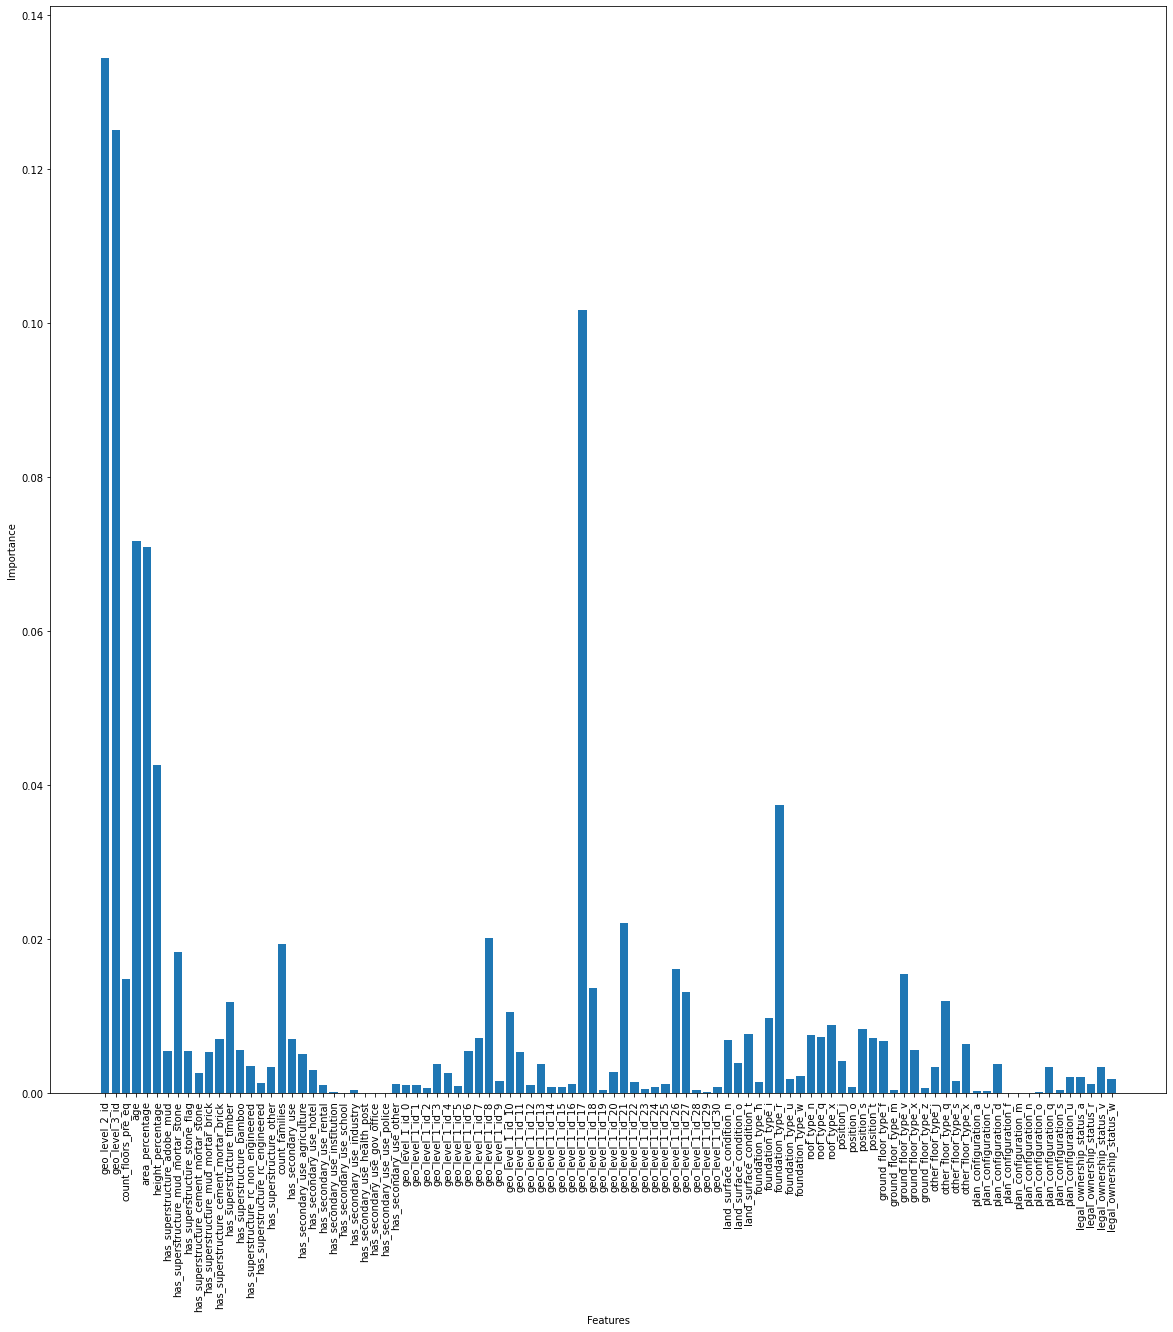

In [38]:
fig, ax = plt.subplots(figsize = (20,20))
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel("Features")
plt.xticks(rotation = 90)
plt.ylabel("Importance")
plt.show()

<AxesSubplot:xlabel='column'>

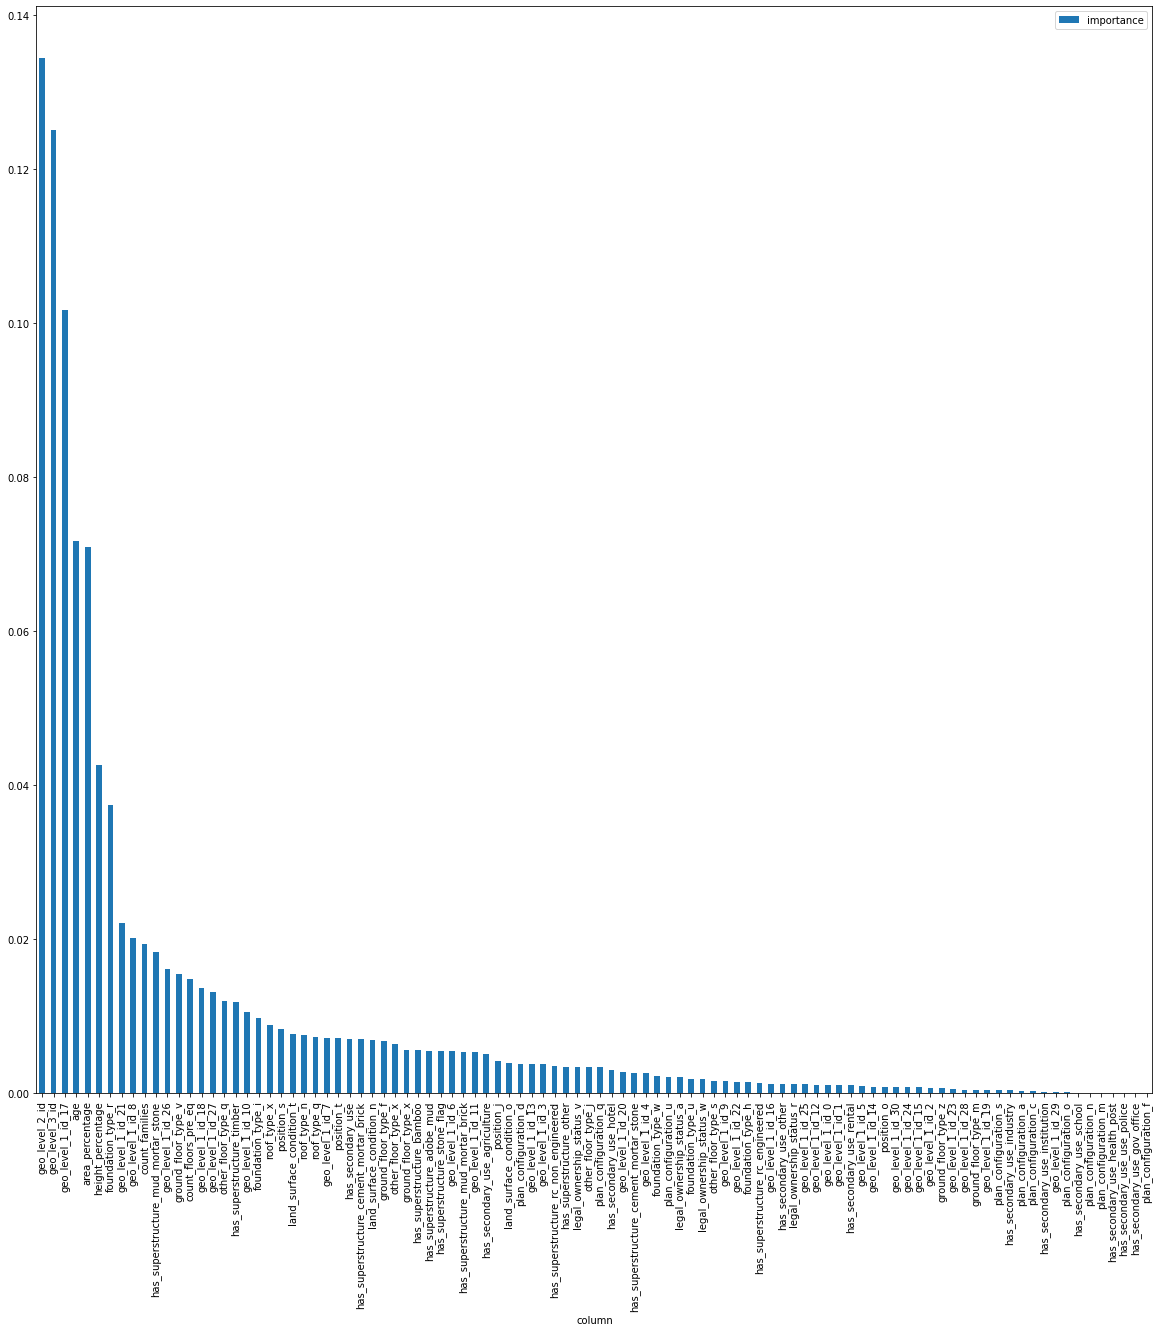

In [50]:
df = pd.DataFrame({"column": X_train.columns.to_list(), "importance": rf_model.feature_importances_})
df = df.sort_values("importance", ascending=False).set_index("column")
df.plot(kind='bar', figsize = (20,20), orientation='vertical')

In [55]:
# values['count_floors_pre_eq'].sort_values()

130300    1
192486    1
60988     1
60989     1
192484    1
         ..
54754     7
225241    7
249209    7
4790      8
10702     9
Name: count_floors_pre_eq, Length: 260601, dtype: int8